In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%run 'utils/arffconverter.ipynb'
%run 'utils/decisiontreegraphmaker.ipynb'

## Lasy losowe

Lasy losowe to klasyfikator nadający się do rozwiązywania problemów zarówno klasyfikacji, jak i regresji. Składa się z zestawu wytrenowanych w losowy sposób drzew decyzyjnych, z których każdy podejmuje niezależnie decyzję. Jako ostateczną decyzję klasyfikatora lasu losowego wybierana jest ta decyzja, która była najliczniejsza spośród decyzji drzew decyzyjnych.

Zasadę działania lasów losowych prezentuje poniższa grafika.

<img src="img/random_forest.png" alt="Naive net" style="height: 350px;"/>

W ramach niniejszego skryptu skupiono się na zadaniu klasyfikacji przez lasy losowe.

---

### Opis zasady działania

Zestaw danych przykładowych `Iris` [[1](https://en.wikipedia.org/wiki/Iris_flower_data_set)] zawiera informacje o wielkości elementów kwiatu irysa i przynależnosć do konkretnego gatunku. Przynależność do konkretnego gatunku na podstawie tych informacji spróbuje przewidzieć wytrenowany w dalszej części tego skryptu klasyfikator lasów decyzyjnych.

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = np.array([iris.target_names[i] for i in iris.target])

Relacje wzajemne atrybutów w zbiorze testowym przedstawiono na poniższym zestawie wykresów:

In [ ]:
sns.pairplot(df, hue='species')

W kolejnej części następuje podział na dane trenujące i weryfikujące:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], iris.target, test_size=0.5, stratify=iris.target, random_state=123456)

Klasyfikator lasów decyzyjnych, podobnie jak inne klasyfikatory bibloiteki `scikit-learn`, trenowany jest za pomocą funkcji `fit()`. 

* Najważniejszym parametrem tego klasyfikatora jest `n_estimators`. Określa on ile drzew decyzyjnych wejdzie w skład rodziny klasyfikatorów lasu decyzyjnego. 

* `criterion` określa kryterium wyboru podczas podziału na węzły decyzyjne w procesie trenowania drzewa decyzyjnego. Możliwe wartości to `gini` oraz `entropy`. 

Po wytrenowaniu klasyfikatora, pod komórką wyświetli się opis powstałego obiektu wraz z wartościami wszystkich parametrów.

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy')
rf.fit(X_train, y_train)

Funkcja `predict()` wykorzystuje wytrenowany las do podjęcia decyzji o klasyfikacji. Aby sprawdzić klasyfikację w porównaniu do poprawnych wartości, wykorzystywana jest funkcja `accuracy_score`. Warto zauważyć, że tym razem użyto zbioru `X_test`. Klasyfikator do tej pory nie miał styczności z tymi danymi.

In [ ]:
predicted = rf.predict(X_test)
print(f'Średnia poprawność klasyfikacji: {accuracy_score(y_test, predicted):.3}')

Jak można zauważyć, poprawność klasyfikacji jest dość wysoka (ok. 94%).

Wszystie drzewa decyzyjne są określone w atrybucie `estimators_` lasu losowego. Można zwizualizować drzewo wchodzące w skład lasu za pomocą klasy `DecisionTreeGraphMaker`:

In [ ]:
DecisionTreeGraphMaker().draw_graph(rf.estimators_[0], X_train.columns)      

### Macierz pomyłek - confusion matrix

Macierz pomyłek [[2](https://en.wikipedia.org/wiki/Confusion_matrix)] to metoda wizualizacji błędu klasyfikacji w celu oceny jej jakości. Każdy z wierszy reprezentuje instancje klasy przewidziane przez klasyfikator, natomiast kolumny reprezentują instancje klasy poprawnej, zapisanej w zbiorze weryfikującym.

Na poniższej macierzy pomyłek można zauważyć, że jedynie kilka (dokładnie 5) gatunków `versicolor` zostało sklasyfikowanych jako `virginica`. 


In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=iris.target_names, index=iris.target_names)
sns.heatmap(cm, annot=True)

## Klasyfikacja i K-krotna walidacja krzyżowa plików ARFF
---
Poniższa tablica zawiera wykorzystywane w [poprzednich skryptach](1_SieciBayesowskie.ipynb) pliki ARFF:

In [1]:
arff_paths= ['data/car.arff',     #0
            'data/credit.arff',   #1
            'data/patient.arff',  #2
            'data/weather.arff',  #3
            'data/tumor.arff',    #4
            'data/zoo.arff']      #5

Wybór pliku ARFF do dalszej analizy odbywa się za pomocą modyfikacji zmiennej `arff_file_index`. Dane zostają załadowane i od razu podzielone na trenujące i weryfikacyjne.

In [4]:
arff_file_index = 0

data = load_arff(arff_paths[arff_file_index])
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.5, random_state=123456)

W kolejnym kroku wybrany plik ARFF zostaje wytrenowany w analogiczny sposób do poprzedniego klasyfikatora lasu losowego:

In [5]:
randomForest = RandomForestClassifier(n_estimators=10, criterion='entropy')
randomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

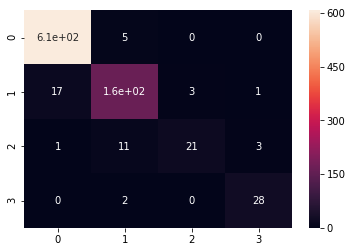

In [6]:
predicted_values = randomForest.predict(X_test)
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, predicted_values))
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#DecisionTreeGraphMaker().draw_graph(randomForest.estimators_[0], None)      